### Examen: Procesos estocásticos 2021-2022 (convocatoria extraordinaria)

2022-06-13

#### Apellidos: RUBIO PINTADO
#### Nombre: ADRIÁN

1. El trabajo debe ser individual. No obstante, se permite utilizar el material del curso, así como información, excepto código, de otras fuentes. En caso de que se utilice material ajeno, se debe citar tales fuentes.

2. Para que la entrega sea válida es necesario rellenar la declaración de autoría, firmarla y entregarla.

3. El plazo de entrega se extiende hasta las 20:00 del lunes 2022-06-13.

4. La entrega consiste en un único fichero `.zip`, cuyo nombre debe ser de la forma 
`<apellido1>_<apellido2>_<nombre>_PE_2020_2021.zip`. En el nombre no se deben utilizar tildes. espacios, mayúsculas, o tildes. Por ejemplo,
`suarez_gonzalez_alberto_PE_2020_2021.zip`.
Este fichero comprimido debe incluirlos siguientes ficheros:
    1. Este cuaderno (*notebook*) de Python con las soluciones de ejercicios y las derivaciones en celdas de tipo *markdown*. En caso de que se prefiera entregar derivaciones manuscritas, se incluirán en el cuaderno de Python como imágenes. 
    2. Ficheros ficheros `.py` necesarios para se pueda ejecutar el código del cuaderno de Python.
    4. La declaración de autoría rellena y firmada. La firma puede ser escaneada.

5. Indicad vuestro nombre y apellidos y fecha de realización al principio de todos los ficheros entregados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

import stochastic_plots as stoch
import codigo as pe #código desarrollado para el examen

### Ejercicio 1: Cadenas de Markov.

#### Ejercicio 1.1.

Consideremos una cadena de Markov con 4 estados, cuya matriz de transición es
$$
\begin{array}{c|c|c|c}
\text{Estado inicial / final} & P_1 & P_2 & P_3 & P_4\\
\hline
P_1 & *    & 0.2  & 0.4 & 0.4 \\
P_2 & 0.3  & *    & 0.5 & 0.2 \\
P_3 & 0.3  & 0.4  & *   & 0.3 \\
P_4 & 0.2  & 0.3  & 0.5 & * 
\end{array}
$$






1.  Deriva la solución estacionaria para este proceso.
2. Simula trayectorias del proceso para $t = 0, 1, 2, ..., N$ suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_1$.
3. Haz la gráfica de $3$ de las trayectorias simuladas con $N = 100$.
4. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso a partir de una única trayectoria.
    2. Estima la distribución del proceso en el límite $t \rightarrow \infty$ a partir de los estados finales para $M = 1000$ trayectorias simuladas.
    3. Compara los resultados de los dos apartados anteriores.
\end{enumerate}
\end{enumerate}
\item
\end{comment}

In [2]:
# Transition matrix of the jump process

P = np.array([[0, 0.2, 0.4, 0.4], 
              [0.3, 0, 0.5, 0.2], 
              [0.3, 0.4, 0, 0.3],
              [0.2, 0.3, 0.5, 0]
             ])
print(np.around(P,4))

[[0.  0.2 0.4 0.4]
 [0.3 0.  0.5 0.2]
 [0.3 0.4 0.  0.3]
 [0.2 0.3 0.5 0. ]]


**1.1.1**

Disponemos de una cadena de Markov discreta en el tiempo. De modo igual que para una cadena de markov en tiempo contínuo, podemos derivar la distribución estacionaria tal que:

*El vector de probabilidad $\pi$ siendo una distribución estacionaria de la cadena, si $\pi^{T}$ es un autovector izquierdo de la matriz de transición P(t) con autovalor 1:
 $$\pi^{T} P(t)=  \pi^{T}  \forall t \geq 0$$
Si la distribución de X(0) es $\pi$,  la distribución en X(t) es también $\pi$.*

Calculamos los valores descritos con numpy:

In [3]:
# Matrix of left eigenvectors of P  by rows 
np_eigenvalues, np_left_eigenvectors = LA.eig(P.conj().T)
np_left_eigenvectors = np_left_eigenvectors.conj()

print('Left eigenvectors (numpy)')
print(np.around(np_left_eigenvectors, 4))

Left eigenvectors (numpy)
[[ 0.4207-0.j     -0.1732-0.4784j -0.1732+0.4784j  0.113 -0.j    ]
 [ 0.4716-0.j     -0.4519+0.2917j -0.4519-0.2917j  0.5055-0.j    ]
 [ 0.6299-0.j     -0.0204+0.1867j -0.0204-0.1867j -0.8291-0.j    ]
 [ 0.4516-0.j      0.6455-0.j      0.6455+0.j      0.2106-0.j    ]]


In [4]:
# Eigenvector with maximum abs(eigenvalue) (equal to 1)
print('\nLeft eigenvector corresponding the maximum eigenvalue in absolute value')
idx = np.argmax(np.abs(np_eigenvalues))
np_left_eigenvector_max_eigenvalue = np.real(np_left_eigenvectors[:,idx])
print(np.around(np_left_eigenvector_max_eigenvalue, 4))


Left eigenvector corresponding the maximum eigenvalue in absolute value
[0.4207 0.4716 0.6299 0.4516]


In [5]:
# Normalize to obtain the stationary distribution
print('Stationary  distribution')
stationary_distribution = np_left_eigenvector_max_eigenvalue \
                          / np.sum(np_left_eigenvector_max_eigenvalue)
print(np.around(stationary_distribution, 4))

Stationary  distribution
[0.2132 0.2389 0.3191 0.2288]


Obtenemos la distribución estacionaria $\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]  $

**1.1.2**

Al ser una cadena en tiempo discreto, consideramos que el tiempo que pasamos en cada estado es la unidad.
Empleamos la función "simula_trayectoria_discrete_mc". Tomamos N=100

In [6]:
init_state=0 #(estado P1)
t_ini=0
t_fin=100
trajectory = pe.simula_trayectoria_discrete_mc(init_state, P, t_ini,t_fin)

In [7]:
trajectory[0:20]

[0, 3, 1, 0, 2, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 0, 2, 1, 2, 1]

**1.1.3**

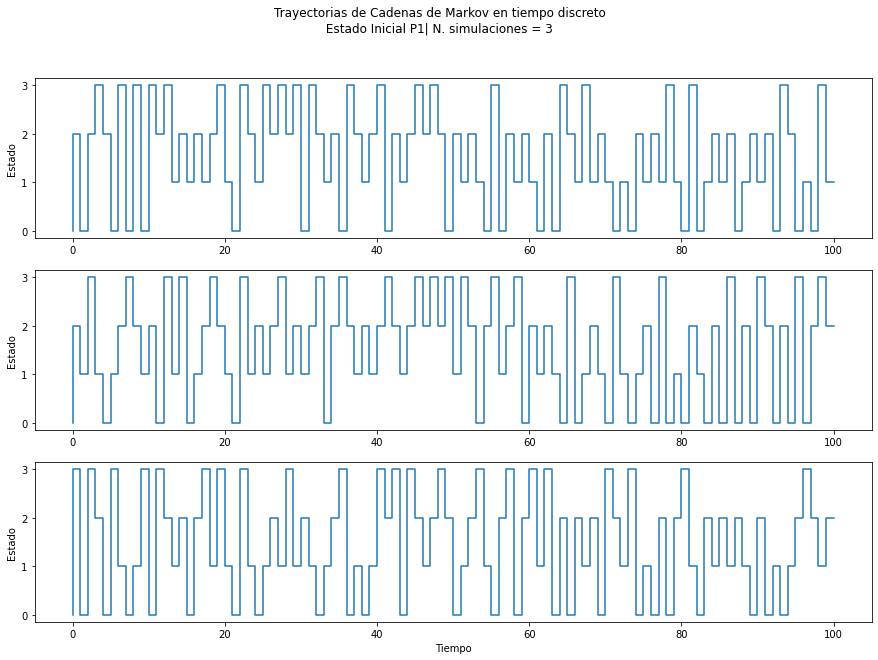

In [8]:
# Hacemos 3 simulaciones
N_simul = 3
trajectories = []
init_state=0 #(estado P1)
t_ini=0
t_fin=100

for i in range(N_simul):
    trajectories.append(pe.simula_trayectoria_discrete_mc(init_state, P, t_ini,t_fin))

    
# Plot trajectorias
fig, ax = plt.subplots(3, 1, figsize=(15, 10), num=1)
title = "Trayectorias de Cadenas de Markov en tiempo discreto"
title += f"\n Estado Inicial P1| N. simulaciones = {N_simul} "
plt.suptitle(title)
plt.xlabel("Tiempo")

for m in range(N_simul):
    ax[m].step([i for i in range(0,t_fin+1)],trajectories[m])
    ax[m].set_ylabel("Estado")
    ax[m].set_yticks([0, 1, 2,3])


**1.1.4.A**

La distribución estacionaria(si existe) para una cadena de Markov discreta se puede calcular tal que:

$$\lim_{t \to \infty} P_{m,n}^{t} = \pi_{n} \forall m,n$$

Es decir, la probabilidad de estar en el estado n cuando el tiempo tiende a infinito, o en la práctica, cuando es muy grande.

Para estimarlo por simulación tomamos un t muy grande, y estimamos dicha distribución como la proporción de veces que ha estado cada estado como "elegido" al hacer los saltos.

In [9]:
init_state=0 #(estado P1)
t_ini=0
t_fin=10000
trajectory = pe.simula_trayectoria_discrete_mc(init_state, P, t_ini,t_fin)


N_states = len(P[0])
#Conteo de numero de veces que hemos pasado por cada estado
_, states_count = np.unique(trajectory, return_counts=True)
#Proporcion
pi_stationary_distrib_estimation = states_count/np.sum(states_count)
print("Distribución estacionaria estimada :")
print(np.around(pi_stationary_distrib_estimation,4))

Distribución estacionaria estimada :
[0.2115 0.2373 0.3181 0.2332]


Recordando el valor calculado de distribución estacionaria  era $\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]  $

Por tanto la estimación utilizando simulación es bastante próxima al valor teórico.

**1.1.4.B**

In [10]:
N_simul = 1000
trajectories = []
init_state=0 #(estado P1)
t_ini=0
t_fin=1000

for i in range(N_simul):
    trajectories.append(pe.simula_trayectoria_discrete_mc(init_state, P, t_ini,t_fin))

#ultimos estados de cada simulación
last_states = np.array([trajectory[-1] for trajectory in trajectories])
#Calculamos la proporción
_, distribution  = np.unique(last_states, return_counts=True)
distribution = distribution / np.sum(distribution)

print("Distribución estimada para la cadena en tiempo discreto:")
print(np.around(distribution,4)) 

Distribución estimada para la cadena en tiempo discreto:
[0.241 0.231 0.29  0.238]


Vemos como al igual que en el apartado anterior, la distribución estimada se parece bastante a la calculada teóricamente.

**1.1.4.C**

Vemos como  la distribución estimada en los apartados 1.1.4.A y 1.1.4.B  se parece bastante a la calculada teóricamente.

Esto es porque estamos intentando calcular la probabilidad de estar en un estado determinatdo cuando el tiempo t tiende a infinito.Por lo tanto si generamos muchas simulaciones y tomámos el último estado(considerando ese estado como el estado en tiempo infinito) o consideramos una sola simulación pero muy muy larga, vamos a obtener resultados similares. Confiamos que debido a la naturaleza del problema(distribucion de estados-proabilidades), gracias a la ley de los grandes números,  acabaremos aproximando igualmente el valor del vector estacionario pi.

#### Ejercicio 1.2
Suponiendo que se trata de una cadena de Markov en tiempo continuo, y que, en promedio, el proceso pasa $2$ minutos en $P_1,$ $30$ segundos en $P_2$, $1$ minuto en $P_3$ y minuto y medio en $P_4$.

1. Escribe la matriz de transiciones para el proceso de saltos subyacente (*jump process*). 
2. Deriva la distribución estacionaria para el proceso de saltos.
3. Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.
4. Deriva el correspondiente generador infinitesimal.
5. A partir del generador infinitesimal deriva la distribucón estacionaria del proceso y compárala con el resultado anterior.
6. Simula trayectorias del proceso para suponiendo que en el instante $t = 0$ el sistema se encuentra en el estado $P(t=0)  = P_1$.
7. Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:
    1. Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria de la cadena de Markov en tiempo continuo. 
    2. Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria del proceso. 
    3. Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \rightarrow \infty$ a partir de los estados finales en $M = 1000$ trayectorias simuladas.
    4. Comenta los resultados de los apartados anteriores.

8. ¿Coinciden las distribuciones estacionarias de una cadena de Markov en tiempo discreto con el mismo diagrama de transición y la derivada para el proceso en tiempo continuo? En caso de que coincidan indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente en tiempo discreto.

**1.2.1**

$$P = \begin{pmatrix}
      0 & 0.2 & 0.4 & 0.4  \\
      0.3 & 0 & 0.5 & 0.2 \\
      0.3 & 0.4 & 0 & 0.3 \\
      0.2 & 0.3 & 0.5 & 0 
\end{pmatrix}$$

**1.2.2**

De modo igual que para la cadena de markov en tiempo discreto del ejercicio anterior, podemos derivar la distribución estacionaria de la misma manera:

*El vector de probabilidad $\pi$ siendo una distribución estacionaria de la cadena, si $\pi^{T}$ es un autovector izquierdo de la matriz de transición P(t) con autovalor 1:
 $$\pi^{T} P(t)=  \pi^{T}  \forall t \geq 0$$
Si la distribución de X(0) es $\pi$,  la distribución en X(t) es también $\pi$.*



Obteniendo la misma distribución estacionara que en tiempo discreto: $\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]  $

**1.2.3**

Sabemos que el tiempo que pasamos en cada estado sigue una distribución exponencial de parámetro λ,
 con tiempo medio en cada estado de  $\frac{1}{\lambda}$.  En nuestro caso, sabemos que las medias son(tomando minutos) 2, 0.5, 1 y 1.5 respectivamente, por lo que los lambdas asociados serán:
$$(\lambda_{1},\lambda_{2}, \lambda_{3}, \lambda_{4} ) = (\frac{1}{2}, 2 ,1 , \frac{2}{3})$$

Sabiendo además que $\pi_{j} ∝ \frac{\tilde{\pi_{j}}}{\lambda_{j}}$

$\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]   $



$ (\pi_{1}, \pi_{2}, \pi_{3}, \pi_{3} ) = (\frac{\tilde{\pi_{1}}}{\lambda_{1}}, \frac{\tilde{\pi_{2}}}{\lambda_{2}}, \frac{\tilde{\pi_{3}}}{\lambda_{3}}, \frac{\tilde{\pi_{4}}}{\lambda_{4}})  = (0.4264,0.11945,0.3191,0.3432 ) $

 y que $\pi_{1} + \pi_{2} + \pi_{3} + \pi_{4} = 1$, para normalizar:


In [11]:
pi_s = np.array([0.4264,0.11945,0.3191,0.3432]) / np.sum([0.4264,0.11945,0.3191,0.3432])
pi_s

array([0.35293631, 0.09887017, 0.26412283, 0.28407069])

In [12]:
np.round(pi_s,4)

array([0.3529, 0.0989, 0.2641, 0.2841])

Por tanto:
$(\pi_{1}, \pi_{2}, \pi_{3}, \pi_{4}  ) =  (0.3529, 0.0989, 0.2641, 0.2841)$

**1.2.4**

Sabemos que el generador infinitesimal para una CTMC es:

$$g_{ij} = \left\{ \begin{array}{lcc}
             \lambda_{i}p_{ij} &  si &   i \neq j \\
             \\ -\lambda_{i} &  si &   i = j 
             \end{array}
   \right.$$

Así que para nuestro caso:

$$ G = \begin{pmatrix}
          -\lambda_{1} & \lambda_{1}0.2 & \lambda_{1}0.4 & \lambda_{1}0.4 \\
          \lambda_{2}0.3 & -\lambda_{2} & \lambda_{2}0.5 & \lambda_{2}0.2 \\
          \lambda_{3}0.3 & \lambda_{3}0.4 & -\lambda_{3} & \lambda_{3}0.3 \\
           \lambda_{4}0.2 & \lambda_{4}0.3 & -\lambda_{4}0.5 & -\lambda_{4}\\
\end{pmatrix} = 
\begin{pmatrix}
          -0.5 & 0.1 & 0.2 & 0.2\\
          0.6 & -2 & 1  &  0.4 \\
          0.3 & 0.4 & -1 & 0.3\\
          \frac{2}{15} & 0.2 & \frac{1}{3} & -\frac{2}{3}\\
\end{pmatrix}$$

**1.2.5**

La distribución estacionaria de una CTMC cuyo generador infinitesismal es $G$, es $\pi$, si y solo si: $$\pi^T G = 0$$

Es decir, para nuestro caso tenemos que
$$(\pi_{1},\pi_{2}, \pi_{3}, \pi_{4} )  \begin{pmatrix}
          -0.5 & 0.1 & 0.2 & 0.2\\
          0.6 & -2 & 1  &  0.4 \\
          0.3 & 0.4 & -1 & 0.3\\
          \frac{2}{15} & 0.2 & \frac{1}{3} & -\frac{2}{3}\\
\end{pmatrix} = 0 $$

Para normalizar la distribución estacionara añadimos la condición $\pi_{1} + \pi_{2} + \pi_{3} + \pi_{4} = 1$.

Resolviendo mediante la herramienta online sympy el sistema de ecuaciones planteado **obtenemos:**

In [13]:
from sympy import *
x, y, z,w = symbols('x, y, z, w')
eq1 = -0.5*x + 0.6*y + 0.3*z + (2/15)*w
eq2 = 0.1*x  -2*y + 0.4*z + 0.2*w
eq3 = 0.2*x + y - z + (1/3)*w
eq4 = 0.2*x + 0.4*y + 0.3*z - (2/3)*w
eq5 = x+y+z+w
solve([eq1, eq2,eq3,eq4,eq5-1], (x, y,z,w))

{x: 0.352900069881202,
 y: 0.0988819007686932,
 z: 0.264150943396226,
 w: 0.284067085953878}

$$ \pi^T = (\pi_{1},\pi_{2}, \pi_{3},  \pi_{4} ) \approx (0.3529, 0.0989, 0.2642,0.2841)$$

Vemos como el resultado es equivalente a la derivación anteriormente calculada.

**1.2.6**

In [14]:
#lambda rates
lambda_rates = np.array([0.5,2,1, (2/3)]) 
#estado incicial, num simulaciones, tiempo inicial, tiempo final
state_0, M, t0, t1 = 0, 4, 0, 100

In [15]:
#simulación
arrival_times, trajectories = pe.simulate_continuous_time_Markov_Chain(P = P, 
                                                                      lambda_rates = lambda_rates, 
                                                                      state_0=state_0 , N_simul=M, t_ini=t0, t_fin=t1)

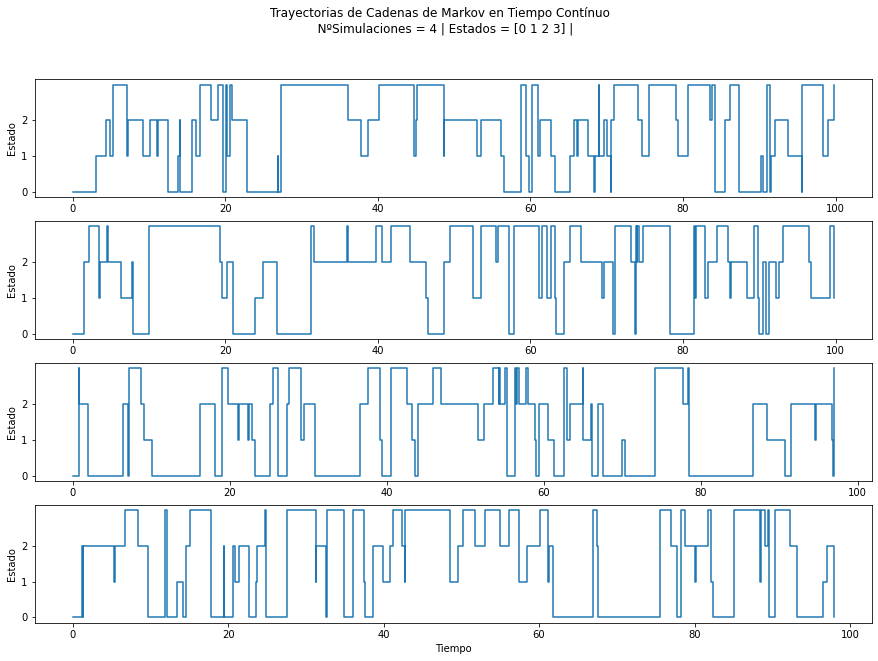

In [16]:
# Plot trajectorias
fig, ax = plt.subplots(M, 1, figsize=(15, 10), num=1)
title = "Trayectorias de Cadenas de Markov en Tiempo Contínuo"
title += f"\n   NºSimulaciones = {M} | Estados = {np.arange(len(lambda_rates))} |"
plt.suptitle(title)
plt.xlabel("Tiempo")

for m in range(M):
    ax[m].step(arrival_times[m], trajectories[m], where ='post')
    ax[m].set_ylabel("Estado")
    ax[m].set_yticks([0, 1, 2])


**1.2.7.A**

La distribución estacionaria(si existe) para una cadena de Markov en tiempo continuo se puede calcular tal que:

$$\lim_{t \to \infty} P_{m,n}^{t} = \pi_{n} \forall m,n$$

Es decir, la probabilidad de estar en el estado n cuando el tiempo tiende a infinito, o en la práctica, cuando es muy grande.

Para estimarlo por simulación tomamos un t muy grande, y estimamos dicha distribución como la proporción de veces que ha estado cada estado como "elegido" al hacer los saltos.

In [17]:
#estado incicial, num simulaciones, tiempo inicial, tiempo final
state_0, M, t0, t1 = 0, 1, 0, 10000

arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P = P, 
                                                                      lambda_rates = lambda_rates, 
                                                                      state_0=state_0 , N_simul=M, t_ini=t0, t_fin=t1)

N_states = len(lambda_rates)

#Conteo de numero de veces que hemos pasado por cada estado
_, states_count = np.unique(trajectories_CTMC, return_counts=True)
#Proporcion
pi_stationary_distrib_estimation = states_count/np.sum(states_count)
print("Distribución estacionaria estimada para el proceso de saltos:")
print(np.around(pi_stationary_distrib_estimation,4))

Distribución estacionaria estimada para el proceso de saltos:
[0.2098 0.243  0.3198 0.2274]


Recordando el valor calculado de distribución estacionaria  era $\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]   $

Por tanto la estimación utilizando simulación es bastante próxima al valor teórico.


**1.2.7.B**

La distribución estacionaria de una cadena de Markov en tiempo contínuo se puede obtener tambíen como un límite, de modo que:

$$\lim_{t \to \infty} P(X(t)=n | X(0) = m) = \pi_{n} \forall m,n$$

Para poder simular esto, podemos estimar la distribución estacionaria de la cadena como la proporción del tiempo que pasa la cadena en cada estado n, para un tiempo t simulado muy grande.

Para ello hacemos uso de las dos salidas que nos da nuestra funciónd de simulación:los tiempos de llegada, de los que calcularemos los holding times, y los asociaremos a los estados correspondientes a los dados por las trayectorias(es decir, queremos ver cuanto tiempo hemos pasado en total en cada estado).

In [18]:
#estado incicial, num simulaciones, tiempo inicial, tiempo final
state_0, M, t0, t1 = 0, 1, 0, 10000

arrival_times, trajectories = pe.simulate_continuous_time_Markov_Chain(P = P, 
                                                                      lambda_rates = lambda_rates, 
                                                                      state_0=state_0 , N_simul=M, t_ini=t0, t_fin=t1)

arrival_times = arrival_times[0]
trajectories = trajectories[0]
N_states = len(lambda_rates)

#intervalos de tiempo(holding times)
times = [arrival_times[i+1]-arrival_times[i] for i in range(len(arrival_times)-1)] #hasta el penúltimo intervalo, ya que estamos tomando la diferencia
times.append(t1-arrival_times[-1]) #el último intervalo es la diferencia con t1, con t1 el tiempo límite de la simulación
times = np.array(times)

#lista de los arrays de indices en los que está cada estado
trajectories = np.array(trajectories)
states = [np.where(trajectories == state)[0] for state in range(len(lambda_rates))]

#proporcion de tiempos en los que se pasa  cada estado(normalizamos con t1-t0)
stationary_dist_cont =  np.array([np.sum(times[state]) for state in states]) / (t1 - t0)

print("Distribución estacionaria estimada para la cadena en tiempo continuo:")
print(np.around(stationary_dist_cont,4))

Distribución estacionaria estimada para la cadena en tiempo continuo:
[0.3567 0.1025 0.2681 0.2726]


Recordando que la distribución estacionaria de la cadena que habíamos obtenido era:
$(\pi_{1}, \pi_{2}, \pi_{3}, \pi_{4}  ) =  (0.3529, 0.0989, 0.2641, 0.2841)$

Con lo que podemos asegurar que nos aproximamos bastante al valor teórico.

**1.2.7.C**

In [19]:
#estado incicial, num simulaciones, tiempo inicial, tiempo final
state_0, M, t0, t1 = 0, 1000, 0, 25

arrival_times, trajectories = pe.simulate_continuous_time_Markov_Chain(P = P, 
                                                                      lambda_rates = lambda_rates, 
                                                                      state_0=state_0 , N_simul=M, t_ini=t0, t_fin=t1)
#ultimos estados de cada simulación
last_states = np.array([trajectory[-1] for trajectory in trajectories])
#Calculamos la proporción
_, distribution  = np.unique(last_states, return_counts=True)
distribution = distribution / np.sum(distribution)

print("Distribución estimada para la cadena en tiempo continuo:")
print(np.around(distribution,4))

Distribución estimada para la cadena en tiempo continuo:
[0.366 0.085 0.252 0.297]


De modo similar a lo que ocurría en el ejercicio 1.1.4, observamos cómo la distribución estimada en los apartados 1.2.7.B y 1.1.4.C se parecen bastante a la calculada teóricamente.

Esto es porque estamos intentando calcular la probabilidad de estar en un estado determinado cuando el tiempo t tiende a infinito.Por lo tanto si generamos muchas simulaciones y tomámos el último estado(considerando ese estado como el estado en tiempo infinito) o consideramos una sola simulación pero muy muy larga, vamos a obtener resultados similares. Confiamos que debido a la naturaleza del problema(distribucion de estados-proabilidades), gracias a la ley de los grandes números, acabaremos aproximando igualmente el valor del vector estacionario pi


**1.2.7.D**

(Comentados en cada apartado anterior)

**1.2.8**

No, no coinciden. Recodemos que la distribución estacionaria de la cadena de saltos $\tilde{\pi}$, y la distribución estacionaria dela CTMC $\pi$, guardaban la siguiente relación de proporcionalidad :

$$\pi_{i} = \frac{\frac{\tilde{\pi_{i}}}{\lambda_{i}}}{∑_{k \in S} \frac{\tilde{\pi_{k}}}{\lambda_{k}}} i \in S$$

Donde en el proceso de saltos se obtenía la distribución estacionaria calculando el autovector izquierdo con la matriz P de transición.

Si coincidiría si todas las lambdas fueran iguales: $\forall i: \lambda_{i} = \lambda$. De este modo tendríamos:
$$\pi_{i} = \frac{\tilde{\pi_{i}}}{∑_{k \in S} \tilde{\pi_{k}}} i \in S$$

Como el sumatorio de pi's tiene que sumar 1:
$$\pi_{i} = \tilde{\pi_{i}}$$

De modo que como vemos, el modo de calcularlo en tiempo contínuo y discreto es exactamente el mismo.

Esto lo podemos aplicar a nuestro ejemplo , tomando la distribucion de tiempos igual para todos los estados:

In [20]:
lambda_rates_2=np.array([1,1,1,1])

arrival_times, trajectories = pe.simulate_continuous_time_Markov_Chain(P = P, lambda_rates = lambda_rates_2, state_0=state_0 ,
                                         N_simul=3000, t_ini=0, t_fin=150)
#ultimos estados de cada trayectoria
last_states = np.array([trajectory[-1] for trajectory in trajectories])
#calculamoos la proporcion
_, distribution  = np.unique(last_states, return_counts=True)
distribution = distribution / np.sum(distribution)

print("Distribución de la CTMC estimada:")
print(distribution)

Distribución de la CTMC estimada:
[0.21866667 0.25466667 0.30833333 0.21833333]


Recordamos la distribución estacionaria para el tiempo discreto derivada en el ejercicio 1.1.1: $\tilde{π}^T = [0.2132, 0.2389, 0.3191, 0.2288]  $

Comprobamos como los valores ahora sí ya son aproximadamente los mismos en tiempo contínuo que en tiempo discreto para este caso particular de los valores de los lambdas.

### Ejercicio 2.
Consideremos el proceso estocástico
$$
S(t + T) = S(t_0) \exp\left\{ \left(r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} X \right\}, \ \ X \sim N(0, 1).
$$


#### Ejercicio 2.1.
Este proceso obedece una ecuación diferencial ordinaria de la forma
$$
dS(t) = a\left(t, S(t)\right) dt + b\left(t, S(t)\right) dW(t).  
$$
Deriva la forma de $a\left(t, S(t)\right)$, el término de deriva (determinista) y de $$b\left(t, S(t)\right)$$, el término de difusión (estocástico).

#### Ejercicio 2.2
El desarrollo de Itô-Taylor, para $S(t + dt)$ en torno a $t$ es de la forma
$$
S(t + dt) = S(t) +  D_1(t) dt^{1/2} + D_2(t) dt  + \mathcal{O}\left(dt^{3/2}\right).
$$
1. Deriva la forma de $D_1(t)$ y de $D_2(t)$. Para ello utiliza simplemente el desarrollo de Taylor de la exponencial y agrupa los términos proporcionales a $dt^{1/2}$ y a $dt$.
2. Comenta la relación entre estos términos y los que aparecen en los métodos de Euler-Maruyana y Milstein para simular trayectorias del proceso descrito por la ecuación diferencial estocástica.

**SOLUCIÓN**

**2.1**

Nos encontramos con un proceso estocástico del tipo Movimiento Geométrico Browniano. Donde $\sigma$ y $r$ son constantes que miden la volatilidad y el drift respectivamente.

Así que sabemos que la derivación debe corresponderse a:
$$
dS(t) = r\left(t, S(t)\right) dt + \sigma\left(t, S(t)\right) dW(t).  
$$



Deriva la forma de $a\left(t, S(t)\right)$, Correspondiéndose el primer término a la deriva, siendo determinista, y el segundo término al término de difusión, el cual viniendo de un proceso de Wiener es estocástico.

**NOTA:** *Sustituimos $r$ por $\mu$ para seguir la misma notación que la literatura, en ambos casos nos referiremos a la misma constante.*


Vamos a demostrarlo.

Esto vamos a hacerlo desde la solución hasta que lleguemos a la solución analítica. Aplicando el teorema de Ito con $f(t) = \ln{S(t)}$. Por comodidad escribiremos $S(t)$ como $S_{t}$.

$$d\log S_t= \frac{\partial\log S_t}{\partial t} +\frac{\partial \log S_t}{\partial S_t} dS_t + \frac12 \frac{\partial^2 \log S_t}{\partial S_t^2}d\langle S_t,S_t\rangle$$

Tenemos ahora que:
$$\frac{\partial\log S_t}{\partial t} = 0$$
al no depender la función directamente de $t$

Tenemos también que:
$$\frac{\partial \log S_t}{\partial S_t} dS_t = \frac{1}{S_t}$$

debido a la definición de derivada del logaritmo.


Y además sabemos que la segunda derivada del logaritimo:
$\frac{\partial^2 \log S_t}{\partial S_t^2}dS_t = -\frac{1}{S_t^2}$


De modo que obtenemos la expresión:

$$
d\log S_t= \frac{1}{S_t}dS_t - \frac12 \frac{1}{S_t^2}d\langle S_t,S_t\rangle
$$

La variación cuadrática de $\langle S_t,S_t\rangle$ es $\sigma^2 S_t^2$, así que:

$$
d \log S_t = \left(\mu -\frac{\sigma^2}{2}\right) dt +\sigma dW_t
$$

Integramos a cada lado:

$$\log S_t = \log  S_0 + (\mu-\frac12 \sigma^2)t +\sigma W_t$$

Ahora solo nos queda aplicar la exponencial a cada lado:

$$S_t=S_0   \exp\left\{  (\mu-\frac12 \sigma^2)t +\sigma W_t \right\}$$

Siendo esta la expresión analítica de la que partíamos en el enunciado.

NOTA:
Para este apartado se han utilizado las siguientes fuentes:

    1. Transparencias y videos de clase
    2. Wikipedia: entrada de teorema de Itô: https://es.wikipedia.org/wiki/Lema_de_It%C3%B4
    3. Wikipedia: entrada de teorema Geometric Brownian motion: https://en.wikipedia.org/wiki/Geometric_Brownian_motion
    4. Mathexhange: https://quant.stackexchange.com/questions/33360/on-the-application-of-itos-lemma-to-geometric-brownian-motion
    5. Artículo "Geometric Brownian Motion Model in Financial Market
"http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.637.5650&rep=rep1&type=pdf


**2.2**

La extensión de Itô-Taylor es simplemente una "extensión" de la expansión de Taylor que considera el hecho de que tenemos procesos estocásticos($W_t$ en nuestra expresión).

### Ejercicio 3.
Consideremos la ecuación diferencial estocástica
$$
\begin{eqnarray}
dr(t) & = & - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt + \sigma dW(t),
\end{eqnarray}
$$
con $\alpha$, $\beta$ y $\sigma$ constantes reales positivas. 

#### Exercise 3.1.
1. Deriva la ecuación diferencial ordinaria (EDO) para $\mathbb{E} \left[r(t) \right] $.
2. Deriva fórmula analítica la solución de la EDO partiendo de la condición inicial $r(t_0) = r_0$.
3. En la solución aparencen términos a distintas escalas de tiempo. Identifica tales escalas y describe el comportamiento de la solución para cada una de dichas escalas. Para este análisis puede ser útil considerar los casos $\alpha \ll \beta$ y $\beta \gg \alpha$ por separado.
4. Determina el comportamiento de la media y de la desviación estándar de la solución en el régimen asintótico ($t \rightarrow \infty$).
5. Determina el comportamiento de la solución en el límite $\alpha = \beta$.


<u>Sugerencia</u>: Una forma de encontrar la solución de la ODE es suponiendo que esta es de la forma
$$
\mathbb{E} \left[r(t) \right] = \tilde{r}(t) - c e^{-\beta \left(t - t_0 \right)}, 
$$
para alguna constante $c$.
Elige el valor de $c$ de forma que la ecuación para $\tilde{r}(t)$ se simplifique.

**SOLUCIÓN**

Definimos la SDE para la simulación:

In [83]:
#Tomamos valores "arbitrarios" para las constantes
alpha = 2
beta = 1.2
sigma = 0.12
T = 15
M = 10000
N = 100


#Condicion inicial
t0=0
r0 = 0.1

r_inf = 0.05

# Define SDE
def a(t,x): return -alpha*(x-r_inf*(1- np.exp(  -beta*(t-t0)  ) ))
def b(t,x): return sigma*x
def db_dx(t,x): return sigma #derivada de b respecto a x

Nos encontramos ante el una realización de un proceso de Ornstein-Uhlenbeck. En concreto es una ligera modificación del modelo de Vasicek, muy utilizado en finanzas para describir la curva de interés a corto plazo en el tiempo.

Al tipo de interés a largo plazo $r_\infty$ (constante), le hemos añadido la función dependiente del tiempo $(1 - e^{-\beta \left(t - t_0 \right)} )$ a modo de factor multiplicativo , de forma que ahora el interés a largo plazo presenta un crecimiento logarítmico. 

Podemos ver un ejemplo de este crecimiento en la siguiente gráfica(suponiento $r_\infty$ =1 ):

Text(0.5, 1.0, 'Factor de crecimiento del interes a largo plazo')

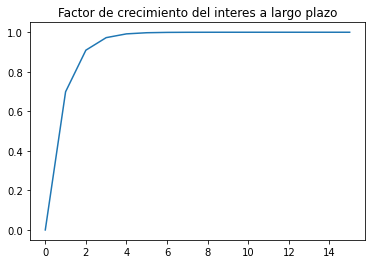

In [14]:
def growing_factor(t):
    return 1- np.exp(  -beta*(t-t0))

                      

plt.plot([i for i in range(16)], [growing_factor(i) for i in range(16)])
plt.title("Factor de crecimiento del interes a largo plazo")   

**3.1.1**

Podemos usar el expresión obtenida en el siguiente apartado, y calcular $
E(r(t)) = E\left(E(r(t)|r(t_0)=r_0)\right)$ y tomar el límite cuando $t$ tiende a infinito:

Es decir, tendríamos $ E(r(t)) = \lim_{t\to\infty}E( r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )+\left(r_{0}-r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )\right) e^{-\alpha\left(t-t_{0}\right)}) = r_{\infty}$
    

**3.1.2**

Usando la fórmula de la esperanza iterada para una v.a. X y números reales a y b:
$$E(aX+b)=aE(X)+b
$$

Tenemos que:

$$
\begin{aligned}
E\left(r(t)|r(t_0)=r_0\right) & = E\left(r_\infty (1 - e^{-\beta \left(t - t_0 \right)} ) + (r_0 - (r_\infty (1 - e^{-\beta \left(t - t_0 \right)} )))e^{-\alpha(t -t_0)}+\sigma \sqrt{\frac{1-e^{-2 \alpha\left(t-t_{0}\right)}}{2 \alpha}} Z\right) \\ & = r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )+\left(r_{0}-r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )\right) e^{-\alpha\left(t-t_{0}\right)}+\sigma \sqrt{\frac{1-e^{-2 \alpha\left(t-t_{0}\right)}}{2 \alpha}} E\left(Z\right) 
\end{aligned}
$$

Como Z es una Normal $N(0,1)$, su esperanza es 0 y eliminamos el segundo sumando:
    


$$
\begin{aligned}
E\left(r(t)|r(t_0)=r_0\right)  & = r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )+\left(r_{0}-r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )\right) e^{-\alpha\left(t-t_{0}\right)}
\\ 
\end{aligned}
$$

Podemos graficar este resultado:

In [ ]:
#Media teórica
def theoric_mean(t):
    return r_inf*growing_factor(t) + (r0 - (r_inf*growing_factor(t))  )*np.exp(-1*alpha*(t-t0))

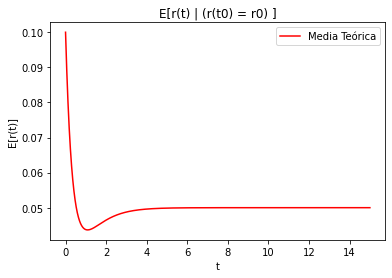

In [101]:
fig, ax = plt.subplots(1, 1)


N=10000

t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
_ = plt.plot(t, theoric_values, label = "Media Teórica", c='red') 

title = f"E[r(t) | (r(t0) = r0) ]"
plt.legend()
plt.title(title)
plt.xlabel('t')
_ = plt.ylabel('E[r(t)]')

**3.1.3**

Por rapidez, vamos a comparar las dos situaciónes mediante valores empíricos:

Consideramos primero el caso en el que $\alpha << \beta$ y graficamos:

In [112]:
alpha = 0.1
beta = 10000

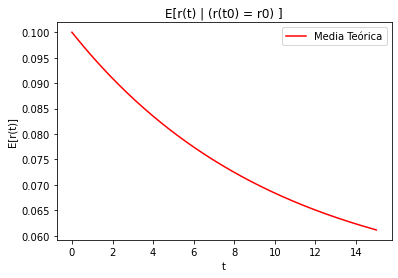

In [113]:
fig, ax = plt.subplots(1, 1)


N=10000

t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
_ = plt.plot(t, theoric_values, label = "Media Teórica", c='red') 

title = f"E[r(t) | (r(t0) = r0) ]"
plt.legend()
plt.title(title)
plt.xlabel('t')
_ = plt.ylabel('E[r(t)]')

Y ahora cuando  $\alpha >> \beta$ y graficamos:

In [114]:
alpha = 10000
beta = 0.1

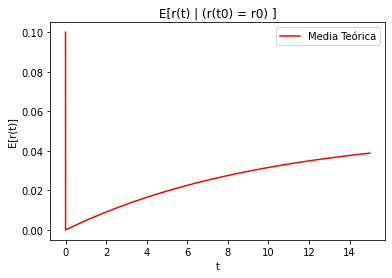

In [115]:
fig, ax = plt.subplots(1, 1)


N=10000

t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
_ = plt.plot(t, theoric_values, label = "Media Teórica", c='red') 

title = f"E[r(t) | (r(t0) = r0) ]"
plt.legend()
plt.title(title)
plt.xlabel('t')
_ = plt.ylabel('E[r(t)]')

Como podemos apreciar, cuando $\alpha << \beta$ la evolución temporal de la media es casi lineal de $r_0$ a $r_\infty$. En cambio cuando $\alpha >> \beta$, partimos desde 0 para los primeros instantes, mientras que convergemos a $r_\infty$, es decir, $r_0$ no tiene ningún peso en nuestra ecuación temporal.

In [ ]:
#Restablecemos valores para los siguientes apartados
alpha = 2
beta = 1.2

**3.1.4**

Tal y como calculamos en el apartado 3.1.1, $ E(r(t)) = r_{\infty}$, es decir, que independientemente de la condición inicial, en régimen asitótico se converge a $r_{\infty}$

**3.1.5**

Recordamos que teníamos $$
\begin{aligned}
E\left(r(t)|r(t_0)=r_0\right)  & = r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )+\left(r_{0}-r_{\infty}(1 - e^{-\beta \left(t - t_0 \right)} )\right) e^{-\alpha\left(t-t_{0}\right)}
\\ 
\end{aligned}
$$

Como  $$\alpha = \beta$$

Hacemos por simplicidad en los cálculos el cambio de variable $a = e^{-\alpha\left(t-t_{0}\right)} = e^{-\beta\left(t-t_{0}\right)}$

Tenemos que: 
$$
\begin{aligned}
E\left(r(t)|r(t_0)=r_0\right)  & = r_{\infty} - ar_{\infty} + a(r_0-r_{\infty}+ar_{\infty}) \\ 
        &= a^2 r_{\infty} -2ar_{\infty} +a r_0 + r_{\infty} 
\end{aligned}
$$

Viendo, *tal y como comentábamos antes de resolver el apartado 3.1.1*, **a como un factor de crecimiento en el tiempo acotado en [0,1]**. Es decir, vemos **a como una constante.**

Podemos separar en dos casos la solución:cuanto t = 0 y a = 0 y cuando t tiendo a infinito y a = 1

Si t = 0, obtenemos:
$$E(r(t)|r(t_0)=r_0)   =  r_{\infty} $$

Si t tiene a $\infty$, obtenemos:
$$E(r(t)|r(t_0)=r_0)   =   r_{\infty} -2r_{\infty} + r_0 + r_{\infty} = r_0 $$

Es decir, que cuando alpha y beta son iguales, nuestro modelo vale $r_{\infty} $ en t=0, y converge asintóticamente a $r_0$

#### Ejercicio 3.2.
1. Integra (soluciona) numéricamente esta EDO utilizando el método de Euler.
2. Compara las soluciones exactas y aproximadas gráficamente. 
3. ¿De qué orden es la convergencia a la solución exacta del método de Euler?
4. Haz una gráfica en la que se muestre la dependencia del error de aproximación con el tiempo, de forma que se ponga de manifiesto el orden de convergencia de la aproximación.

**SOLUCIÓN**


La EDO, Ecuación Diferencial Estocástica, no dispone de término de difusión(estocástico).

Para una ODE de primer orden tal que

$$\frac{dx(t)}{dt} = a(t, x(t))$$

y dada una condición inicial $x(t_0) = x_0$, la solución es tal que:

$$ x(t) = x(t_0) + \int_{t0}^{t} a(s,x(s)) dS $$


Así en nuestro caso la ODE de la que disponemos es:
$$
dr(t) =  - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt 
$$
    

Así que por tanto, dada la condición inicial, la solución que nos queda es(ejercicio 3.1.2):
$$
r(t) = r_\infty (1 - e^{-\beta \left(t - t_0 \right)} ) + (r_0 - (r_\infty (1 - e^{-\beta \left(t - t_0 \right)} )))e^{-\alpha(t -t_0)}
$$

In [ ]:
#Media teórica
def theoric_mean(t):
    return r_inf*growing_factor(t) + (r0 - (r_inf*growing_factor(t))  )*np.exp(-1*alpha*(t-t0))

Mediante el simulación por el método de Euler podemos aproximarnos a esta solución. Para ello llamamos a la función "ode_euler" de nuestro código. Graficamos además la comparativa de la solución derivada para $E[r(t)]$ junto con el resultado de las simulaciones para distinto número de steps:

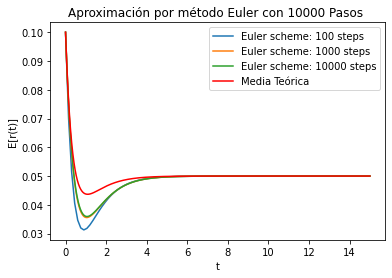

In [75]:
fig, ax = plt.subplots(1, 1)

N=100
t_100, X_mean_Euler_numeric_100 = pe.ode_euler(t0, r0, T, a, N)
ax.plot(t_100, X_mean_Euler_numeric_100, label='Euler scheme: {} steps'.format(N))

N=1000
t_1000, X_mean_Euler_numeric_1000 = pe.ode_euler(t0, r0, T, a, N)
ax.plot(t_1000, X_mean_Euler_numeric_1000, label='Euler scheme: {} steps'.format(N))

N=10000
t_10000, X_mean_Euler_numeric_10000 = pe.ode_euler(t0, r0, T, a, N)
ax.plot(t_10000, X_mean_Euler_numeric_10000, label='Euler scheme: {} steps'.format(N))


t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
_ = plt.plot(t, theoric_values, label = "Media Teórica", c='red') 

title = f"Aproximación por método Euler con {N} Pasos "
plt.legend()
plt.title(title)
plt.xlabel('t')
_ = plt.ylabel('E[r(t)]')

Observamos cómo cuanto mayor es el número de steps(pasos) dados en la simulación, más nos aproximamos en la caída de la gráfica entre t = 0 y t=2, suavizando la diferencia de la misma con la de la media teórica. Dicha minimización se "estanca"  a partir de los 1000 steps.

La convergencia en cualquier caso se alcanza en el mismo tiempo(t=4) para todas las simulaciones, así como para el valor calculado.

Es por ello que un número de steps de 1000 en este caso nos sería suficiente ya que no conseguiremos una convergencia más rápida, y la diferencia respecto a la media teórica sería ya marginal.

Vamos a graficar  la dependencia del error de aproximación con el tiempo.

Definimos el **error local** como la diferencia en cada instante del valor de la aproximación con el valor real:


Text(0.5, 1.0, 'Dependencia del error local de aproximación del método Euler en cada instante ')

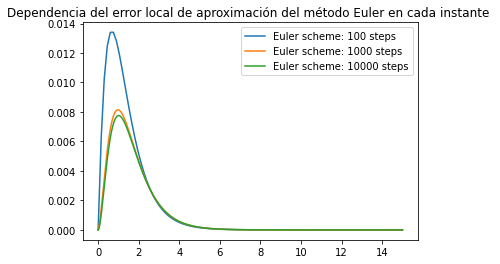

In [92]:
fig, ax = plt.subplots(1, 1)


N=100
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
ax.plot(t, [np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_100,theoric_values)], label='Euler scheme: {} steps'.format(N))


N=1000
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
ax.plot(t, [np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_1000,theoric_values)], label='Euler scheme: {} steps'.format(N))


N=10000
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
ax.plot(t, [np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_10000,theoric_values)], label='Euler scheme: {} steps'.format(N))



title = f"Dependencia del error local de aproximación del método Euler en cada instante "
plt.legend()
plt.title(title)

 Vemos que(para los instantes situados entre t=2 y t=4, donde ya apreciábamos peores aproximaciones) cuanto más corto es el step, mejor es la aproximación a la curva(más pasos implica pasos más pequeños). El error local para el método de euler es cuadrático $O(e_l) = (h^2)$

Para el **error global**, definido como el porcentaje de error acumulado de la simulación para cada instante t, vamos a ver qué ocurre:

Text(0.5, 1.0, 'Dependencia del error global de aproximación del método Euler en función de t ')

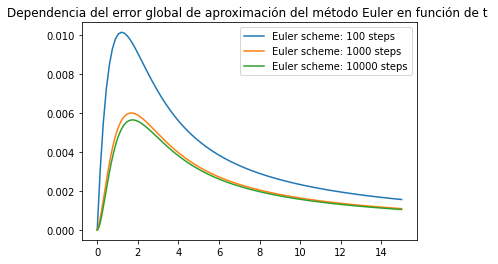

In [96]:
fig, ax = plt.subplots(1, 1)


N=100
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
errs =[np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_100,theoric_values)]
err_acc = [i/j for i,j in zip(np.cumsum(errs), range(1,N+2))]
ax.plot(t, err_acc, label='Euler scheme: {} steps'.format(N))

N=1000
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
errs =[np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_1000,theoric_values)]
err_acc = [i/j for i,j in zip(np.cumsum(errs), range(1,N+2))]
ax.plot(t, err_acc, label='Euler scheme: {} steps'.format(N))


N=10000
t = np.linspace(t0, t0+T, N+1) # integration grid
theoric_values = [theoric_mean(i) for i in t]
errs =[np.abs(i-j) for i,j in zip(X_mean_Euler_numeric_10000,theoric_values)]
err_acc = [i/j for i,j in zip(np.cumsum(errs), range(1,N+2))]
ax.plot(t, err_acc, label='Euler scheme: {} steps'.format(N))



title = f"Dependencia del error global de aproximación del método Euler en función de t "
plt.legend()
plt.title(title)

Para el **error global** vemos que el error es proporcional al tamaño del step, es decir, podemos afirmar que el error cumple de manera aproximada  $O(e_g) = (h)$. Es por ello por lo que se dice que el método de Euler es de orden 1.

#### Ejercicio 3.3.
1. Simula mediante el método de Euler-Maruyana (estocástico) y muestra gráficamente las trayectorias del proceso descrito por la ecuación diferencial estocástica 
$$
dr(t) =  - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt + \sigma dW(t),
$$
partiendo de la condición inicial $r(t_0) = r_0$.
2. Sobre la gráfca de las simulaciones, muestra la media de las trayectorias y la curva para  $\mathbb{E} \left[r(t) \right]$.  Muestra asimismo los niveles asintóticos para la media y para la media más menos dos desviaciones estándar.
3. ¿Qué orden de convergencia tiene el método de Euler estocástico? Ilustra la respuesta de manera gráfica.

Usando la ecuación dada, calculamos las funciones a y b.

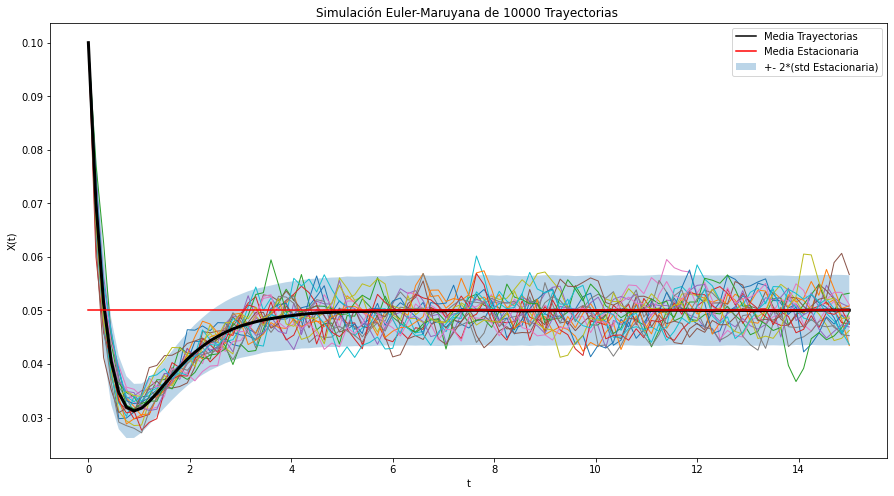

In [85]:
N=100

t, X_euler = pe.euler_maruyana(t0, r0, T, a, b, M, N)

# Plot trajectories 
plt.figure(figsize=(15,8))
stoch.plot_trajectories(t, X_euler, fig_num=1)

# Plot Media
mean = np.mean(X_euler, axis=0)
_ = plt.plot(t, mean,c='black', label="Media Trayectorias")

#Plot del rango de +-2*desviación tipica
std = 2*np.std(X_euler, axis=0)
plt.fill_between(t, mean-std, mean+std, alpha = 0.3, label="+- 2*(std Estacionaria)")

#media estacionaria
plt.plot(t,np.full(len(t), r_inf), c='r', label="Media Estacionaria")

title = f"Simulación Euler-Maruyana de {M} Trayectorias "
plt.title(title)
plt.legend()

Vemos como la media de las trayectorias estocásticas, cubre los mismos valores con igual comportamiento a lo que hemos previsto en los apartados anteriores. Vamos a ver el siguiente método y a comentar los resultados.

#### Ejercicio 3.4.
1. Simula mediante el método de Milstein y muestra gráficamente las trayectorias del proceso descrito por la ecuación diferencial estocástica
$$
dr(t) =  - \alpha \left(r(t) - r_{\infty} \left(1 - e^{-\beta \left(t - t_0 \right)} \right) \right) dt + \sigma dW(t),
$$
partiendo de la condición inicial $r(t_0) = r_0$.
2. Sobre la gráfca de las simulaciones, muestra la media de las trayectorias y la curva para  $\mathbb{E} \left[r(t) \right]$. Muestra asimismo los niveles asintóticos para la media y para la media más menos dos desviaciones estándar.
3. ¿Qué orden de convergencia tiene el método de MIlstein? Ilustra la respuesta de manera gráfica.

In [61]:
def db_dx(t,x): return sigma #derivada de b respecto a x

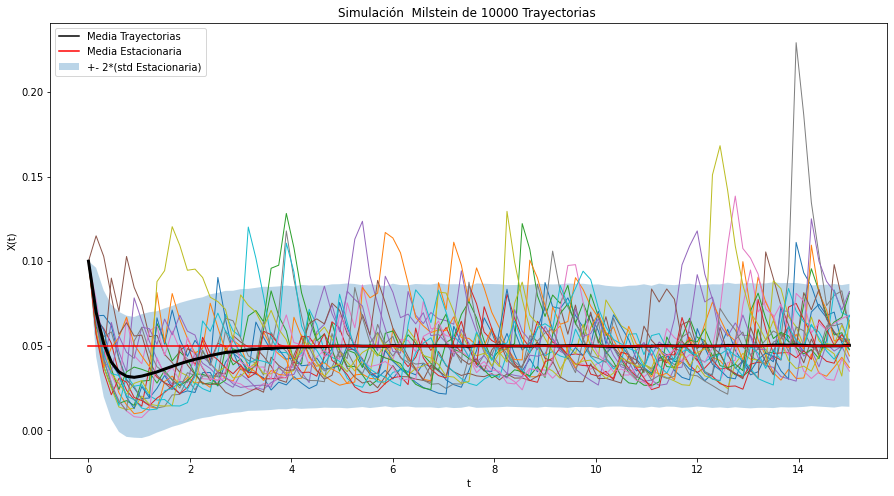

In [89]:
N=100
t, X_milstein = pe.milstein(t0, r0, T, a, b, db_dx, M, N)

# Plot trajectories 
plt.figure(figsize=(15,8))
stoch.plot_trajectories(t, X_milstein, fig_num=1)

# Plot Media
mean = np.mean(X_milstein, axis=0)
_ = plt.plot(t, mean,c='black', label="Media Trayectorias")

#Plot del rango de +-2*desviación tipica
std = 2*np.std(X_milstein, axis=0)
plt.fill_between(t, mean-std, mean+std, alpha = 0.3, label="+- 2*(std Estacionaria)")

#media estacionaria
plt.plot(t,np.full(len(t), r_inf), c='r', label="Media Estacionaria")

title = f"Simulación  Milstein de {M} Trayectorias "
plt.title(title)
plt.legend()

Vemos como este método provoca trayectorias más inestables que Euler-Maruyana, y lo podemos apreciar en una desviación típica mucho mayor. A cambio con este método observamos que la $E[r(t)]$ se aproxima más a la solución real, cometiendo un menor error, en la caída que se poduce entre los instantes 0 y 2, que ya habíamos visto en los apartados anteriores, 3.1 y 3.2.


Es decir, que **Milstein es más preciso, a cambio de introducir una mayor varianza en estimación.**